# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Изучим общую информацию

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

1. Можно перевести тип значений (после исключения значений null):
- в int по колонкам: floors_total, balcony, parks_around3000, ponds_around3000, days_exposition

- в datetime по колонке: first_day_exposition

- в bool по колонке: is_apartment

2. В 14 столбцах из 22 присутствуют пропуски: нужно проанализировать отдельно

In [5]:
data.describe().T.astype('int')

,count,mean,std,min,25%,50%,75%,max
total_images,23699,9,5,0,6,9,14,50
last_price,23699,6541548,10887013,12190,3400000,4650000,6800000,763000000
total_area,23699,60,35,12,40,52,69,900
rooms,23699,2,1,0,1,2,3,19
ceiling_height,14504,2,1,1,2,2,2,100
floors_total,23613,10,6,1,5,9,16,60
living_area,21796,34,22,2,18,30,42,409
floor,23699,5,4,1,2,4,8,33
kitchen_area,21421,10,5,1,7,9,12,112
balcony,12180,1,1,0,0,1,2,5


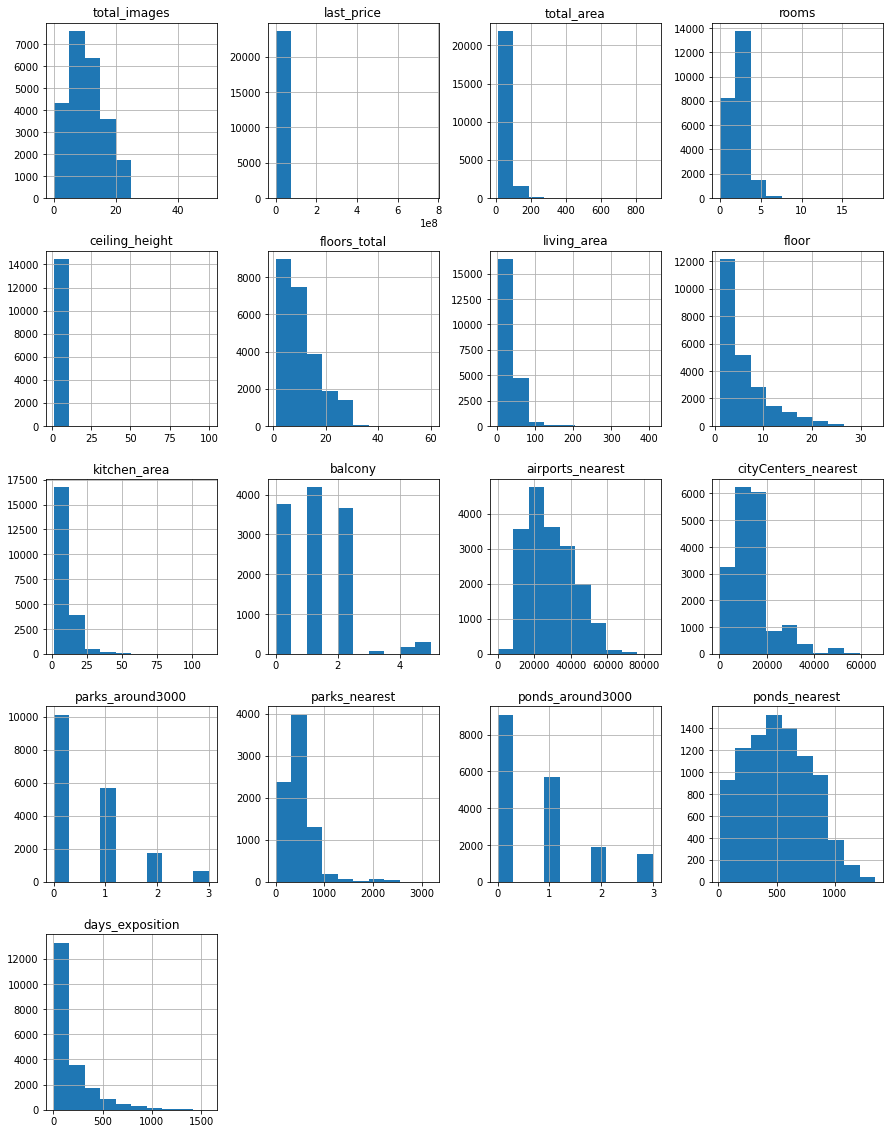

In [6]:
data.hist(figsize=(15, 20));

### Выводу по разделу 1:

last_price: min=12190 и max=763000000 для цены квартиры выглядят аномальными, нужно посмотреть количество строк по ним и отбросить при малой доле. По графику цены находятся в пределах 100 миллионов.

total_area:	min=12 и max=900 для площади квартиры выглядят аномальными, нужно посмотреть количество строк по ним и отбросить при малой доле. По графику площадь > 200 кв.м почти не встречается.

rooms:	max=19 для количества комнат выглядит аномальным, нужно посмотреть количество строк и отбросить при малой доле. По графику комнат > 5 почти не встречается.

ceiling_height:	max=100 для высоты потолка очевидная аномалия, из выборки надо исключить строки с аномально большими значениями. По графику высота потолков находится в пределах 10 метров.

floors_total: max=60 может быть правдивым, но по графику большинство домов не выше 30 этажей.

living_area: min=2 и max=409 для жилой площади квартиры выглядят аномальными, нужно посмотреть количество строк по ним и отбросить при малой доле. По графику площадь > 100 кв.м почти не встречается.

floor: max=33 может быть правдивым, но по графику большинство квартир находятся не выше 20-го этажа.

kitchen_area: min=1 и max=112 для кухни выглядят аномальными, нужно посмотреть количество строк по ним и отбросить при малой доле. По графику площадь в основной массе не больше 22кв.м.	

balcony: max=5 для количества балконов выглядит аномальным, нужно посмотреть количество строк и отбросить при малой доле. По графику у большинство 0-1-2 балконов.		

airports_nearest: min=0 для расстояния до аэропорта очевидная аномалия, из выборки надо исключить строки с аномально малыми значениями.	По графику большинство значений от 10 000 до 60 000 м.

cityCenters_nearest: большинство значений до 60 км от центра.	

parks_around3000: до 3х парков в пределах 3 км.	

parks_nearest: большинство имеющихся значений до 1 км.	

ponds_around3000: до 3х парков в пределах 3 км.	

ponds_nearest: большинство имеющихся значений до 1 км.

days_exposition: min=0 и max=1580 для продажи недвижимости могут быть правдивыми, но отрицательно влиять на среднее, нужно проанализировать дополнительно.

## Предобработка данных

### Переименованы столбцы таблицы

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

### Проверены и обработаны пропуски. Заменены типы.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**ceiling_height**: 9195 пропусков.

Проверим, как много значений выходит за пределы нормальных и решим, заполнить пропуски медианой по исходной таблице или лучше скорректировать предварительно аномальные значения:

<AxesSubplot:ylabel='Frequency'>

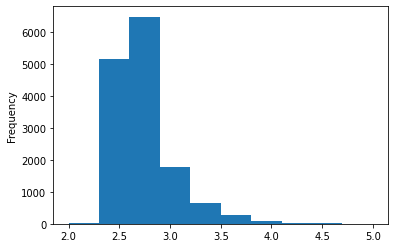

In [9]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5))

<AxesSubplot:ylabel='Frequency'>

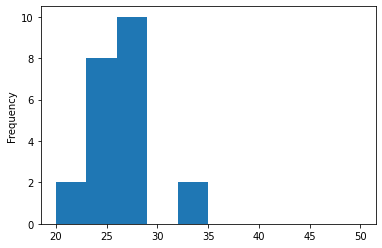

In [10]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(20,50))

In [11]:
# Потолки с высотой более 20 м - ошибка пропашего разделителя, можно поделить зачения на 10, чтобы привести к правдоподобным:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [12]:
# Глядя на график, посчитаем длинный узкий хвост для потолков выше 4.1м
data.query('ceiling_height > 4.1')['ceiling_height'].count()

49

In [13]:
data.query('ceiling_height < 2.50')['ceiling_height'].count()

76

По СанПин высота потолка в жилом помещении не может быть менее 2,5 метров, однако для мансард на площади менее 50% она может быть меньше.

In [14]:
data['ceiling_height'].median()

2.65

In [15]:
data['ceiling_height'].mean()

2.7296076944291228

Средняя и медиана отличаются не сильно, можно взять медиану для заполнения аномальных и пропущенных значений:

In [16]:
data.loc[data['ceiling_height'] > 4.1, 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

display(data.query('ceiling_height > 4.1')['ceiling_height'].count())
display(data['ceiling_height'].isna().sum())
data['ceiling_height'].count()

0

0

23699

In [17]:
data['ceiling_height'].median()

2.65

**floors_total**: 86 пропусков.
На исследование не повлияет, оставляем.


**living_area**: 1903 пропуска.
Значительная часть данных, можно добавить медианные значения в зависимости от количества комнат в квартире.

In [18]:
for a in data['rooms'].unique():
    data.loc[(data['rooms']==a) & (data['living_area'].isna()), 'living_area'] =\
    data.loc[(data['rooms']==a), 'living_area'].median()
    
data['living_area'].isna().sum()


0

**is_apartment**: 20924 пропусков.

Необходимо перевести значения в булевы.

In [90]:
data['is_apartment'] = data['is_apartment'].astype('bool')

data['is_apartment'].isna().sum()


0

**kitchen_area**: 2278 пропусков.
Значительная часть данных, но заполнить нечем, оставляем.

**balcony**: 11519 пропусков.
Можно приравнять пропуски к отсутствию балкона.

In [20]:
data['balcony'] = data['balcony'].fillna(0)

In [21]:
data['balcony'] = data['balcony'].astype('int')


**locality_name**: 49 пропусков.
На исследование не повлияет, оставляем.

**airports_nearest**: 5542 пропусков.

**city_centers_nearest**: 5519 пропусков.

**parks_nearest**: 15620 пропусков.

**ponds_nearest**: 14589 пропусков.

Это картографические данные, их нельзя заполнить самостоятельно. Данные заполнялись только по тем объектам, рядом с которыми есть аэропорты, парки и пруды. А вот по отдаленности от центра данные можно было бы и дополнить.

**parks_around_3000**: 5518 пропусков.
**ponds_around_3000**: 5518 пропусков
Данные отсутствуют по предложениям, рядом с которыми нет парков и прудов. Можно заменить на 0 и перевести значения в целочисленные:

In [22]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')

**days_exposition**: 3181 пропусков.
Значительная часть данных. Значения должны быть получены технически, вероятно, произошел сбой при выгрузке. 
Самостоятельно заполнить не можем, но нужно указать в баг-репорте.

In [23]:

data.query('days_exposition == 0')['days_exposition'].count()

0

In [24]:
data['days_exposition'].isna().sum()

3181

In [25]:
# Заменим формат с вещественного на дату:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Проверены дубликаты

In [27]:
data.duplicated().sum()

0

Явных дубликатов нет.

In [28]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [29]:
data['locality_name'].duplicated().sum()

23334

In [30]:
# Заменим буку ё на е, чтобы наименования не отличались из-за нее:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# Приведем все наименования к верхнему регистру, чтобы не было разночтений:
data['locality_name'] = data['locality_name'].str.upper()

data['locality_name'].sort_values().unique()

array(['БОКСИТОГОРСК', 'ВОЛОСОВО', 'ВОЛХОВ', 'ВСЕВОЛОЖСК', 'ВЫБОРГ',
       'ВЫСОЦК', 'ГАТЧИНА', 'ГОРОДСКОЙ ПОСЕЛОК БОЛЬШАЯ ИЖОРА',
       'ГОРОДСКОЙ ПОСЕЛОК БУДОГОЩЬ', 'ГОРОДСКОЙ ПОСЕЛОК ВИЛЛОЗИ',
       'ГОРОДСКОЙ ПОСЕЛОК ЛЕСОГОРСКИЙ', 'ГОРОДСКОЙ ПОСЕЛОК МГА',
       'ГОРОДСКОЙ ПОСЕЛОК НАЗИЯ', 'ГОРОДСКОЙ ПОСЕЛОК НОВОСЕЛЬЕ',
       'ГОРОДСКОЙ ПОСЕЛОК ПАВЛОВО', 'ГОРОДСКОЙ ПОСЕЛОК РОЩИНО',
       'ГОРОДСКОЙ ПОСЕЛОК СВИРЬСТРОЙ', 'ГОРОДСКОЙ ПОСЕЛОК СОВЕТСКИЙ',
       'ГОРОДСКОЙ ПОСЕЛОК ФЕДОРОВСКОЕ', 'ГОРОДСКОЙ ПОСЕЛОК ЯНИНО-1',
       'ДЕРЕВНЯ АГАЛАТОВО', 'ДЕРЕВНЯ АРО', 'ДЕРЕВНЯ БАТОВО',
       'ДЕРЕВНЯ БЕГУНИЦЫ', 'ДЕРЕВНЯ БЕЛОГОРКА', 'ДЕРЕВНЯ БОЛЬШАЯ ВРУДА',
       'ДЕРЕВНЯ БОЛЬШАЯ ПУСТОМЕРЖА', 'ДЕРЕВНЯ БОЛЬШИЕ КОЛПАНЫ',
       'ДЕРЕВНЯ БОЛЬШОЕ РЕЙЗИНО', 'ДЕРЕВНЯ БОЛЬШОЙ САБСК', 'ДЕРЕВНЯ БОР',
       'ДЕРЕВНЯ БОРИСОВА ГРИВА', 'ДЕРЕВНЯ ВАГАНОВО', 'ДЕРЕВНЯ ВАРТЕМЯГИ',
       'ДЕРЕВНЯ ВАХНОВА КАРА', 'ДЕРЕВНЯ ВЫСКАТКА', 'ДЕРЕВНЯ ГАРБОЛОВО',
       'ДЕРЕВНЯ ГЛИНКА', 'ДЕРЕВНЯ ГОРБУНКИ', 'ДЕРЕВ

In [31]:
data['locality_name'].duplicated().sum()

23368

Приведены к общему виду уникальные значения среди населенных пунктов.

### Выводы по разделу 2:
1. Переименованы столбцы таблицы: cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000
1. По высоте потолков ceiling_height пропуски и значения выше 4.1 (9195 и 49 строк) заполнены медианным значением 2.65 м.
2. По жилой площади living_area 1903 пустых значения заполнены медианным значением в зависимости от количества комнат в квартире.
3. По флагу апартаменты is_apartment значения переведены в булевы. 1-апартаменты, 0-нет.
4. По балконам balcony пропуски (11519 строк) приравнены к отсутствию балкона.
5. Не скорректированы значительные пропуски по:
- kitchen_area: 2278 пропусков (нет разумной аьтернативы);
- картографические данные: airports_nearest: 5542 пропусков; city_centers_nearest: 5519 пропусков; parks_around_3000: 5518 пропусков; parks_nearest: 15620 пропусков; ponds_around_3000: 5518 пропусков; ponds_nearest: 14589 пропусков.
6. Количество дней публикации объявления days_exposition: 3181 пропусков. 
Баг-репорт: возможно, произошел сбой при выгрузке по столбцу days_exposition, поскольку значения NaN по 3181 строкам, хотя с токи зрения выгрузки они не могут отсутствовать. Возможно, такое значение стоит для объявлений, которые удалили в день публикации.
7. Заменен формат с вещественного на дату по 'first_day_exposition'
8. Явных дубликатов не было.
9. Приведены к общему виду уникальные значения среди населенных пунктов по столбцу locality_name


## Посчитаны и добавлены в таблицу новые столбцы

### Добавим столбец с ценой за 1м²

In [32]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,САНКТ-ПЕТЕРБУРГ,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,ПОСЕЛОК ШУШАРЫ,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,САНКТ-ПЕТЕРБУРГ,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,False,False,NaN,0,САНКТ-ПЕТЕРБУРГ,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,САНКТ-ПЕТЕРБУРГ,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0


### Добавим столбцы с днем недели/ месяцем/ годом публикации объявления

In [33]:
data['week_day_exposition']= data['first_day_exposition'].dt.weekday
data['month_exposition']= data['first_day_exposition'].dt.month
data['year_exposition']= data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,week_day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,САНКТ-ПЕТЕРБУРГ,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,ПОСЕЛОК ШУШАРЫ,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,САНКТ-ПЕТЕРБУРГ,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,False,False,NaN,0,САНКТ-ПЕТЕРБУРГ,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,САНКТ-ПЕТЕРБУРГ,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018


### Добавим столбец с типом этажа квартиры

In [34]:
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_class'] = data.apply(floor, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,week_day_exposition,month_exposition,year_exposition,floor_class
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,САНКТ-ПЕТЕРБУРГ,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,ПОСЕЛОК ШУШАРЫ,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,САНКТ-ПЕТЕРБУРГ,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,False,False,NaN,0,САНКТ-ПЕТЕРБУРГ,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,САНКТ-ПЕТЕРБУРГ,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018,другой


In [35]:
data['floor_class'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_class, dtype: int64

### Добавим столбец с расстоянием до центра города в километрах

In [36]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,week_day_exposition,month_exposition,year_exposition,floor_class,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,САНКТ-ПЕТЕРБУРГ,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,False,False,11.0,2,ПОСЕЛОК ШУШАРЫ,12817.0,18603.0,0,NaN,0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,False,False,8.3,0,САНКТ-ПЕТЕРБУРГ,21741.0,13933.0,1,90.0,2,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,True,False,False,NaN,0,САНКТ-ПЕТЕРБУРГ,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0,САНКТ-ПЕТЕРБУРГ,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.0,1,6,2018,другой,8.0


In [37]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_per_square_meter',
       'week_day_exposition', 'month_exposition', 'year_exposition',
       'floor_class', 'city_centers_nearest_km'],
      dtype='object')

### Выводы по разделу 3:

Добавлены новые столбцы для дальнейшего исследования:
1. Цена одного квадратного метра;
2. День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. Месяц публикации объявления;
4. Год публикации объявления;
5. Тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6. Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

## Проведен исследовательский анализ данных

### Исследуем параметры объектов недвижимости

**Общая площадь**

total_area: min=12 и max=900 для площади квартиры выглядят аномальными, по графику площадь > 200 кв.м почти не встречается.

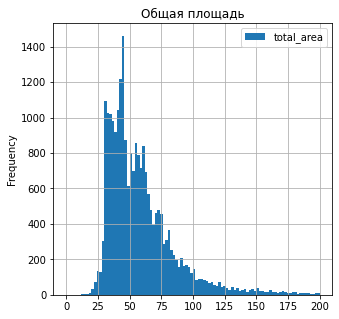

In [38]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,200), title='Общая площадь');

По графику со значениями до 200 видно, что общая площадь в большинстве даже менее 150 и более 20 квадратных метров.
Посчитаем количество выбивающихся данных:

In [39]:
data.query('total_area >= 150')['total_area'].count()

582

In [40]:
data.query('total_area <= 20')['total_area'].count()

35

In [41]:
total_area_mean = data.query('20 <= total_area <= 150')['total_area'].mean()
display(total_area_mean)
data.loc[data['total_area'] >= 150, 'total_area'] = total_area_mean

data.query('total_area > 150')


56.59930846460101

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,week_day_exposition,month_exposition,year_exposition,floor_class,city_centers_nearest_km


**Жилая площадь**

living_area: min=2 и max=409 для жилой площади квартиры выглядят аномальными, по графику площадь > 100 кв.м и < 10 кв.м почти не встречается.

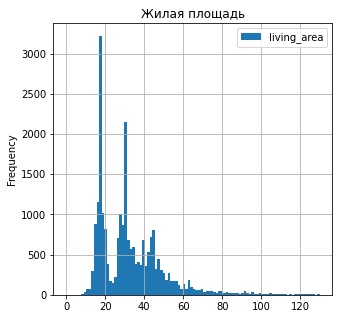

In [42]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,130), title='Жилая площадь');

Посчитаем количество выбивающихся данных:

In [43]:
data.query('living_area >= 100')['living_area'].count()

376

In [44]:
data.query('living_area <= 13')['living_area'].count()

241

In [45]:
data.query('living_area <= 15')['living_area'].count()

1018

In [46]:
living_area_mean = data.query('13 <= living_area <= 100')['living_area'].mean()
display(living_area_mean)
data.loc[data['living_area'] >= 100, 'living_area'] = living_area_mean
data.query('living_area > 100')

32.77589553935936

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,week_day_exposition,month_exposition,year_exposition,floor_class,city_centers_nearest_km


Жилая площадь в большинстве квартир составляет от 13 до 100 кв.м.

**Площадь кухни**

kitchen_area: min=1 и max=112 для кухни выглядят аномальными, по графику площадь в основной массе не больше 25кв.м.

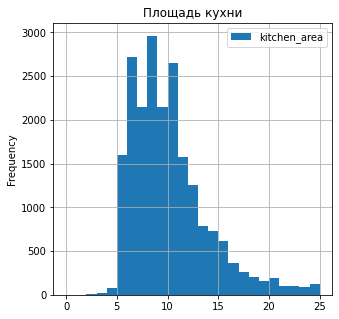

In [47]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 25, grid=True, figsize = (5,5), range = (0,25), title='Площадь кухни');

In [48]:
data.query('kitchen_area >= 25')['kitchen_area'].count()

615

In [49]:
data.query('kitchen_area < 5')['kitchen_area'].count()

105

In [50]:
kitchen_area_mean = data.query('20 <= kitchen_area <= 150')['kitchen_area'].mean()
display(kitchen_area_mean)
data.loc[data['kitchen_area'] >= 150, 'kitchen_area'] = kitchen_area_mean

data.query('kitchen_area > 150')


28.813805004314062

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,week_day_exposition,month_exposition,year_exposition,floor_class,city_centers_nearest_km


Площадь кухни в большинстве квартир составляет от 5 до 25 кв.м.

**Цена объекта**

last_price: min=12190 и max=763000000 для цены квартиры выглядят аномальными, по графику цены находятся в пределах 100 миллионов.

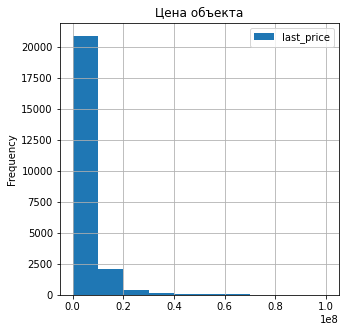

In [51]:
data.plot(y = 'last_price', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (0,100000000), title='Цена объекта');

Посчитаем количество строк с ценой выше 30 млн рублей:

In [52]:
data.query('last_price >= 100000000')['last_price'].count()

37

In [53]:
data.query('last_price >= 30000000')['last_price'].count()

326

In [54]:
data.query('last_price < 1000000')['last_price'].count()

225

In [55]:
last_price_mean = data.query('1000000 <= last_price < 30000000')['last_price'].mean()
display(last_price_mean)
data.loc[data['last_price'] >= 30000000, 'last_price'] = last_price_mean

data.query('last_price > 30000000')

5780994.583290133

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,week_day_exposition,month_exposition,year_exposition,floor_class,city_centers_nearest_km


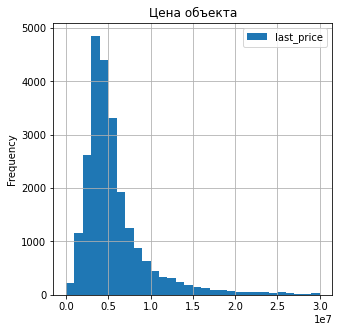

In [56]:
data.plot(y = 'last_price', kind = 'hist', bins = 30, grid=True, figsize = (5,5), range = (0,30000000), title='Цена объекта');

Большинство квартир находятся в ценовом диапазоне 4-5 млн, но также много предложений до 30 млн рублей.

**Количество комнат**

rooms: max=19 для количества комнат выглядит аномальным, по графику комнат > 5 почти не встречается.

In [57]:
data.query('rooms > 5')['last_price'].count()

195

In [58]:
rooms_mean = data.query('rooms <= 5')['rooms'].mean()
display(rooms_mean)
data.loc[data['rooms'] > 5, 'rooms'] = rooms_mean

data.query('rooms > 5')

2.0302501701837987

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,week_day_exposition,month_exposition,year_exposition,floor_class,city_centers_nearest_km


In [59]:
data['rooms'] = data['rooms'].astype('int')

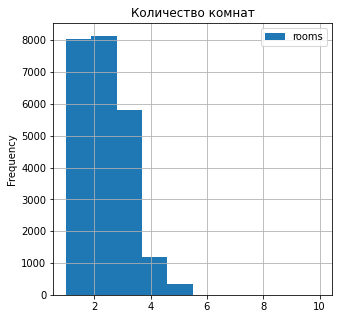

In [60]:
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (1,10), title='Количество комнат');

В большинстве квартир от 1 до 3 комнат. Квартиру с комнатами больше 5 почти не встречаются.

**Высота потолков**

Максимальная высота потолков была приведена к 4.1 м.

In [61]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.693261
std          0.205922
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.100000
Name: ceiling_height, dtype: float64

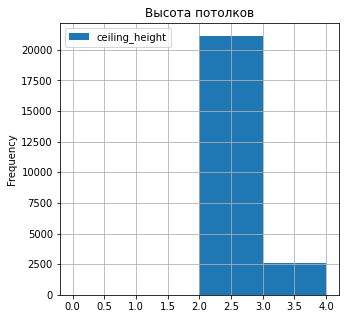

In [62]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 4, grid=True, figsize = (5,5), range = (0,4), title='Высота потолков');

**Этаж квартиры**

floor: max=33 может быть правдивым, но по графику большинство квартир находятся не выше 25-го этажа.

In [63]:
data.query('floor > 25')['floor'].count()

40

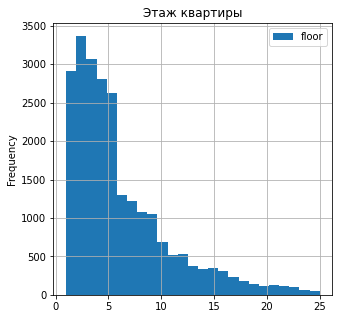

In [64]:
data.plot(y = 'floor', kind = 'hist', bins = 25, grid=True, figsize = (5,5), range = (1,25), title='Этаж квартиры');

Много квартир со второго по пятый этаж, но и широкий пик для более высоких этажей. Возможно, дело в большем количестве малоэтажных зданий в старом фонде, а в новостройках продают квартиры реже.

**Тип этажа квартиры**

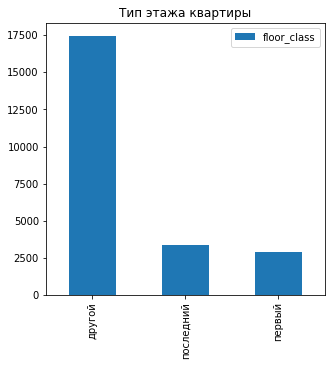

In [65]:
data['floor_class'].value_counts().plot(kind='bar', figsize=(5, 5), legend=True, title='Тип этажа квартиры');

Много квартир находятся не на первом и не на последнем этажах.

**Общее количество этажей в доме**

floors_total: max=60 может быть правдивым, но по графику большинство домов не выше 30 этажей.

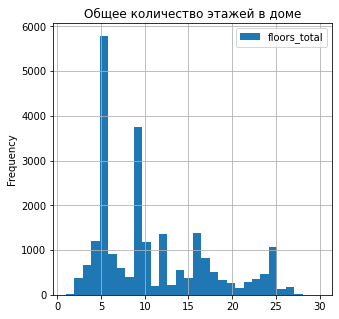

In [66]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,5), range = (1,30), title='Общее количество этажей в доме');

In [67]:
data.query('floors_total > 30')['floors_total'].count()

32

Преобладают пятиэтажки, девятиэтажки, много 12-, 16-, 25-этажных зданий в выборке.

График типа этажа квартиры соответствует этажности зданий - поскольку в большинстве домов этажей больше трех, то и предложений с этажами помимо первого и второго будет больше.

**Расстояние до центра города в метрах;**

city_centers_nearest: большинство значений до 60 км от центра.


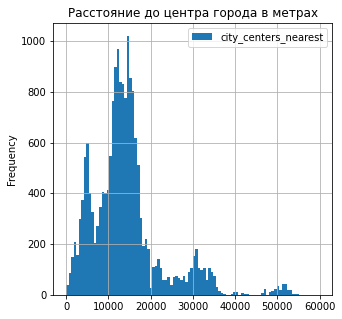

In [68]:
data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,60000), title='Расстояние до центра города в метрах');

Большинство предложений находится в пределах 20 км от центра. Также есть пик в районе 30 км. Меньший пик есть около 50км. Маленькие пики, вероятно, связаны с удаленностью определенных местностей - между ними и городом нет строений, которые можно было бы продать.

**Расстояние до ближайшего аэропорта;**
airports_nearest: min=0 для расстояния до аэропорта очевидная аномалия, по графику большинство значений от 10 000 до 60 000 м.


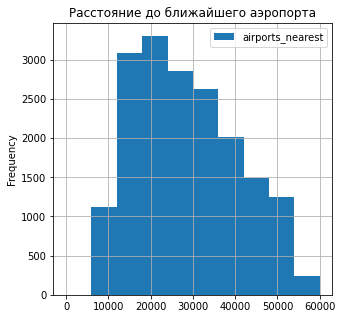

In [69]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (0,60000), title='Расстояние до ближайшего аэропорта');

In [70]:
data.query('airports_nearest < 10000')['airports_nearest'].count()

310

**Расстояние до ближайшего парка;**

parks_nearest: большинство имеющихся значений до 1 км.

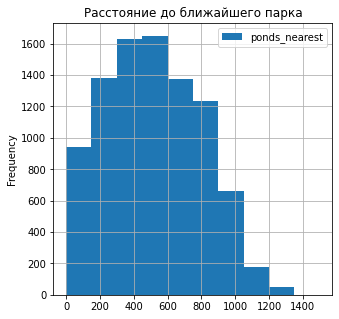

In [71]:

data.plot(y = 'ponds_nearest', kind = 'hist', bins = 10, grid=True, figsize = (5,5), range = (0,1500), title='Расстояние до ближайшего парка');

In [72]:
data.query('parks_nearest > 1000')['parks_nearest'].count()

377

**День и месяц публикации объявления**

'week_day_exposition', 'month_exposition'

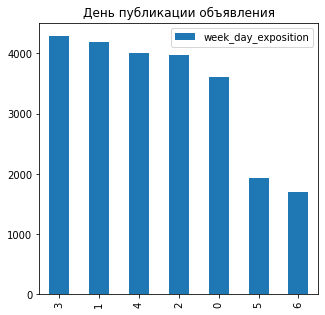

In [73]:
data['week_day_exposition'].value_counts().plot(kind='bar', figsize=(5, 5), legend=True, title='День публикации объявления');

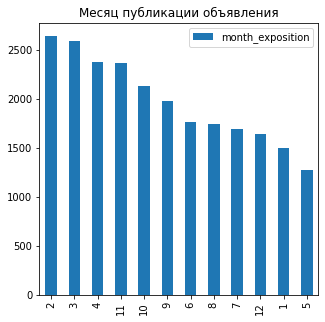

In [74]:
data['month_exposition'].value_counts().plot(kind='bar', figsize=(5, 5), legend=True, title='Месяц публикации объявления');

In [75]:
data.query('month_exposition < 1')['month_exposition'].count()

0

В будни люди публикуют объявления гораздо чаще, чем в выходные. 
По году наибольший всплеск активности с февраоя по апрель, осенью тоже довольно высокие пики, а вот зимой и летом люди расстаются с собственностью неохотно.

### Выводы по разделу 4.1:

Аномальные выбросы по столбцам заменены на средния значения. 

Большинство квартир в выборке общей площадью от 20 до 150 кв.м, при этом жилая площадь составляет от 13 до 100 кв.м, а площадь кухни - от 5 до 25 кв.м.

Большинство предложений стоит 4-5 млн, много квартир в пределах 30 млн рублей, хотя встречается и более дорогое жилье (возможно, есть корреляция между аномально большими площадями и высокой стоимостью).

Стандартная квартира будет состоять не более, чем из 5 комнат (в большинстве 1-3 комнаты) и находиться не выше 20-го этажа в домах стандартной этажности (5, 9, 12, 16, 25 этажей).

Максимальная высота потолков была приведена к 4,1 метра. Медианное значение составляет 2,65 м.

Большинство квартир продается в черте города, но это объясняется и большим количеством квартир в городе в принципе, чем в деревне за 30 или 50 км от Санкт-Петербурга.

Квартиры распределены географически равномерно относительно аэропорта. Однако есть данные о 310 квартирах, расположенных в пределах километра от аэропорта, это кажется неправдоподобным.

Картографические данные есть по находящимся вблизи паркам и прудам - вероятно, при отдалении больше, чем на 1-5 километров, эта информация становится не актуальной для покупателя.

Объявления о продаже публикуют чаще всего в будни весной (с февраля по апрель) или осенью. В январские и майские праздники люди, вероятно, не хотят заниматься продажей своей собственности.

### Как быстро продавались квартиры 

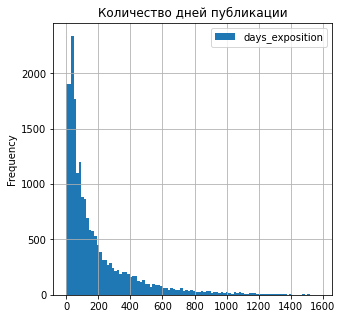

In [76]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,1580), title='Количество дней публикации');

<AxesSubplot:title={'center':'Количество дней публикации'}, ylabel='Frequency'>

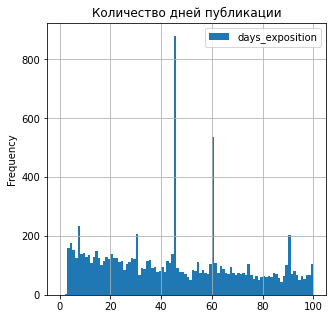

In [77]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,100), title='Количество дней публикации')

Пики находятся на сроке 45 и 60 дней, когда объявление автоматически удаляется, если его не продлить. Вероятно, квартира была продана в промежутке 0-45 дней или 46-60 дней, но продавец сам не снял объявление о продаже.

In [78]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее равно 180 дням, медиана - 95 дням. Большая разница из-за выбросов. Посмотрим диаграмму размаха.

<AxesSubplot:>

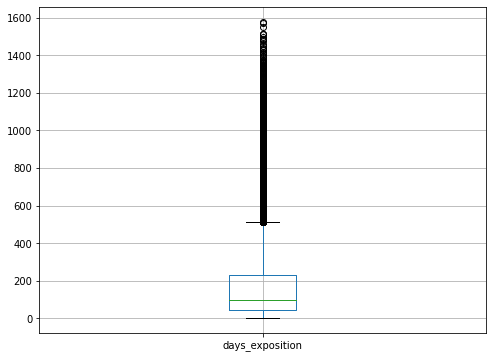

In [79]:
data.boxplot(column='days_exposition', figsize=(8, 6))


**Вывод по разделу 4.2**: Значения от 232 до 500 дней можно считать необычно долгими. Выше 500 - выбросы. Продажи от 1 до 45 дней можно считать быстрыми.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

Зависит ли цена от:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

,mean,count,median
total_area,,,
133.50,29999000.0,1,29999000.0
130.21,29375000.0,1,29375000.0
114.55,28114000.0,1,28114000.0
140.70,27577200.0,1,27577200.0
141.20,26667500.0,2,26667500.0
...,...,...,...
29.62,1300000.0,1,1300000.0
14.00,1190000.0,1,1190000.0
28.60,2034000.0,5,1060000.0


0.6598617350085122

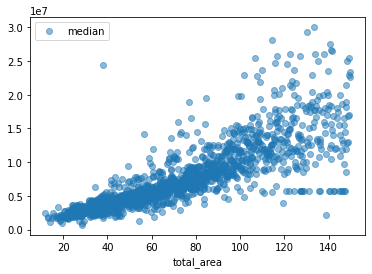

In [80]:
#зависимость стоимости от общей площади
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha=0.5)

display(pivot_table_total_area.sort_values('median', ascending = False))

data['total_area'].corr(data['last_price'])

Между площадью квартиры и стоимостью довольно высокая корреляция - 0,66. Наибольшее количество квартир площадью до 200 кв м при цене продажи до 30 млн рублей. Но есть квартиры, с плоащдью меньше и одновременно ценой выше.

,mean,count,median
living_area,,,
87.80,29900000.0,1,29900000.0
69.75,29500000.0,1,29500000.0
96.60,29500000.0,1,29500000.0
72.79,29375000.0,1,29375000.0
92.50,28800000.0,1,28800000.0
...,...,...,...
16.31,1700000.0,1,1700000.0
18.11,1695000.0,2,1695000.0
12.81,1690715.0,1,1690715.0


0.5730745096357254

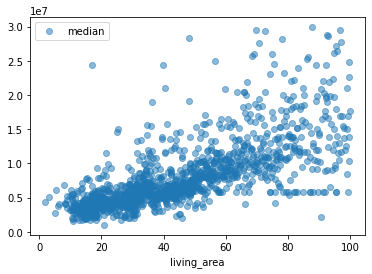

In [81]:
#зависимость стоимости от жилой площади
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o', alpha=0.5)

display(pivot_table_living_area.sort_values('median', ascending = False))

data['living_area'].corr(data['last_price'])

Корреляция стоимости и жилой площади уже меньше, 0,57. От 90 до 150 кв.м цена почти не увеличивается в основной массе. 

,mean,count,median
rooms,,,
5,1.200403e+07,326,10750000.0
4,1.006851e+07,1180,8325000.0
3,7.360178e+06,5814,6033000.0
2,5.655059e+06,8135,4800000.0
1,3.814274e+06,8047,3600000.0
0,3.006663e+06,197,2700000.0


0.46259038782576795

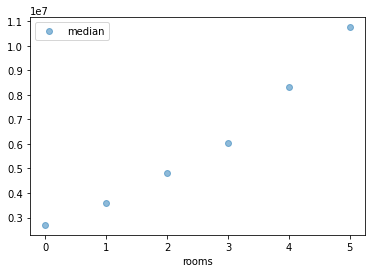

In [82]:
#зависимость стоимости от площади кухни
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.plot(y = 'median', style = 'o', alpha=0.5)

display(pivot_table_rooms.sort_values('median', ascending = False))

data['rooms'].corr(data['last_price'])

Корреляция стоимости и площади кухни снова уменьшилась по сравнению с предыдущими показателями, 0,46. От 16 кв.м до 30 кв.м держится примерно на одном уровне.

,mean,count,median
kitchen_area,,,
25.50,29990000.0,1,29990000.0
23.71,29375000.0,1,29375000.0
40.40,29000000.0,1,29000000.0
27.10,29000000.0,1,29000000.0
32.90,29000000.0,1,29000000.0
...,...,...,...
4.40,1800000.0,2,1800000.0
6.22,1720000.0,1,1720000.0
6.73,1718857.0,1,1718857.0


0.5248849862010978

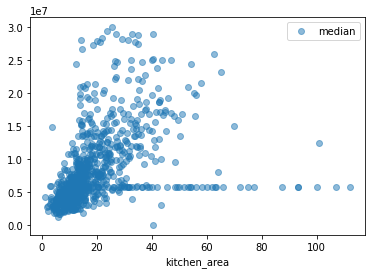

In [83]:
#зависимость стоимости от количества комнат
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o', alpha=0.5)

display(pivot_table_kitchen_area.sort_values('median', ascending = False))

data['kitchen_area'].corr(data['last_price'])

Корреляция между количеством комнат и стоимостью есть (0,52), но подверженная влиянию других факторов. При одинаковом количестве комнат площадь квартиры может очень сильно отличаться, поэтому, например, цена за 2х и 3х комнатную квартиру будет примерно одинаковой при равной площади.

,mean,count,median
floor_class,,,
другой,5.960328e+06,17446,4850000.0
последний,5.575812e+06,3336,4300000.0
первый,4.556437e+06,2917,3900000.0


0.07433950435925483

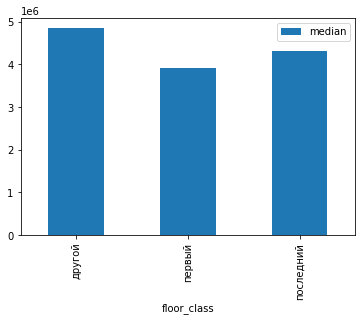

In [84]:
#зависимость стоимости от этажа, на котором расположена квартира (первый, последний, другой)
pivot_table_floor_class = data.pivot_table(index = 'floor_class', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_class.columns = ['mean', 'count', 'median']
pivot_table_floor_class.plot(kind='bar', y = 'median')

display(pivot_table_floor_class.sort_values('median', ascending = False))

data['floor'].corr(data['last_price'])

Корреляция между этажом и стоимостью крайне низкая - 0,03. При этом медианные значения по типам этажей отличаются. На первом этаже продаются самые дешевые квартиры, на последнем цена также ниже, чем на других этажах.

,mean,count,median
week_day_exposition,,,
1,5.746967e+06,4183,4730000.0
2,5.861704e+06,3974,4700000.0
0,5.775357e+06,3612,4650000.0
3,5.856041e+06,4295,4650000.0
4,5.647123e+06,4000,4585000.0
5,5.492210e+06,1936,4555000.0
6,5.478659e+06,1699,4550000.0


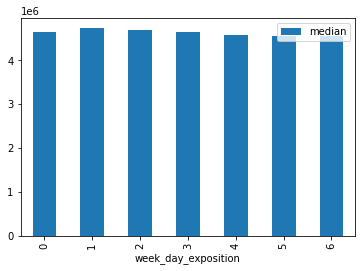

In [85]:
#зависимость стоимости от даты размещения (день недели)
pivot_table_week_day_exposition = data.pivot_table(index = 'week_day_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_week_day_exposition.columns = ['mean', 'count', 'median']
pivot_table_week_day_exposition.plot(kind='bar', y = 'median')

pivot_table_week_day_exposition.sort_values('median', ascending = False)


Корреляция между стоимостью квартиры и днем публикации нелинейная. Во все дни недели медиана стоимости примерно одинаковая. Самые дорогие квартиры продают во вторник и в среду (4,7 млн). Самые дешевые - в субботу и в воскресенье (4,55 млн).

,mean,count,median
month_exposition,,,
4,5.821884e+06,2379,4800000.0
9,5.847629e+06,1981,4700000.0
11,5.818481e+06,2371,4700000.0
12,5.825730e+06,1641,4700000.0
2,5.729115e+06,2640,4650000.0
3,5.657093e+06,2587,4650000.0
7,5.774732e+06,1695,4650000.0
1,5.834062e+06,1500,4600000.0
8,5.677211e+06,1744,4570000.0


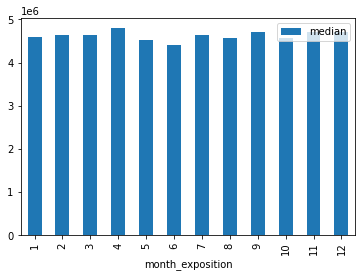

In [86]:
#зависимость стоимости от даты размещения (месяц)
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(kind='bar', y = 'median', style = 'o')

pivot_table_month_exposition.sort_values('median', ascending = False)

Корреляция между стоимостью квартиры и месяцем публикации нелинейная. Во все месяцы медиана стоимости примерно одинаковая.Самое высокое медианное значение наблюдается в апреле (4800000.0 руб.), самое низкое - в июне (4400000.0).

,mean,count,median
year_exposition,,,
2014,9.356524e+06,137,6800000.0
2015,6.688323e+06,1191,5350000.0
2019,6.016548e+06,2879,5050000.0
2016,5.728898e+06,2783,4550000.0
2018,5.521702e+06,8519,4550000.0
2017,5.656133e+06,8190,4500000.0


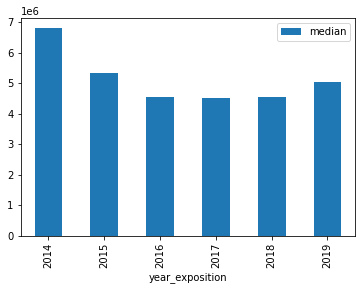

In [87]:
#зависимость стоимости от даты размещения (год)
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(kind='bar', y = 'median', style = 'o')

pivot_table_year_exposition.sort_values('median', ascending = False)

Корреляция между стоимостью квартиры и годом публикации нелинейная. В 2014 году цена была выше всего - медиана равна 6800000.0. Дальше было существенное падение и только в 2019 году стоимость начала расти (5050000.0).

**Вывод по разделу 4.3**: 

Наибольшая корреляция между стоимостью квартиру и общей площадью (0.66). Меньше между стоимостью и жилой площадью (0.57), площадью кухни(0.46) и количеством комнат (0,52).

Нет явной корреляции между стоимостью и типом этажа (0.07).

Между датой, месяцем, годом публикации объявления корреляция нелинейная. 

Во все дни недели и месяцы года медианная стоимость примерно одинаковая. Самые дорогие квартиры продают во вторник и в среду (4,7 млн) в апреле (4,8 млн руб.). Самые дешевые - в выходные (4,55 млн руб.) в июне (4,4 млн руб.). 

В 2014 году цена была выше всего - 6,8 млн руб. Дальше было существенное падение и только в 2019 году стоимость начала расти - 5,05 млн руб.
    

 

### Исследование средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [88]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
display(locality_pivot_table)
#самая высокая стоимость
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

,count,mean
locality_name,,
САНКТ-ПЕТЕРБУРГ,15721,114849.005788
ПОСЕЛОК МУРИНО,556,85681.758993
ПОСЕЛОК ШУШАРЫ,440,78677.379545
ВСЕВОЛОЖСК,398,68654.474874
ПУШКИН,369,103125.818428
КОЛПИНО,338,75424.571006
ПОСЕЛОК ПАРГОЛОВО,327,90175.886850
ГАТЧИНА,307,68746.110749
ДЕРЕВНЯ КУДРОВО,299,92473.588629


,count,mean
locality_name,,
САНКТ-ПЕТЕРБУРГ,15721,114849.005788


,count,mean
locality_name,,
ВЫБОРГ,237,58141.919831


#### Вывод по разделу 4.4:

Наибольшее количество объявлений в наиболее крупных административных единицах. Очевидно наиболее высокая средняя цена за квадратный метр в Санкт-Петербурге (114 849 руб.), наиболее низкая - в Выборге (58 142 руб.). Также дорогой метр в Пушкине (103 126 руб.), Кудрово (92 474 руб.) и Парголово(90 176 руб.).

### Исследование средней цены каждого километра

,mean,count,median
city_centers_nearest_km,,,
6.0,151012.189320,618,131835.0
1.0,177005.395833,192,128485.0
5.0,140509.786957,920,127093.5
7.0,156176.866667,420,127017.0
2.0,157848.983871,310,123035.5
8.0,125671.440536,597,122945.0
4.0,133282.873547,688,117952.5
3.0,121387.442857,350,108469.5
10.0,112727.527121,719,106452.0


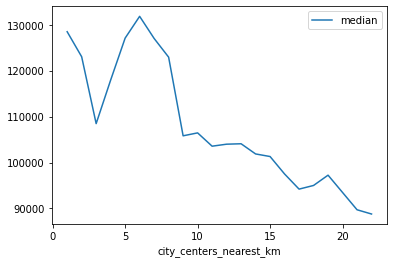

In [89]:
data_spb = data.loc[data['locality_name'] == 'САНКТ-ПЕТЕРБУРГ']
data_spb_per_km = data_spb.pivot_table(index = 'city_centers_nearest_km', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
data_spb_per_km.columns = ['mean', 'count', 'median']
data_spb_per_km.query('count > 100').plot(y = 'median')

data_spb_per_km.query('count > 100').sort_values('median', ascending = False)

### Вывод по разделу 4.5:

Самая высокая цена за кв.метр 131835.0 - в 6 км от центра. Не совсем ясно, почему в пределах 1-5 км от центра цена ниже, хотя все еще остается высокой (108469.5 - 128485.0). Возможно, дело в состоянии жилого фонда.

Начиная с 14-го км от центра стоимость метра начинае снижаться и к 22 километру становится ниже в полтора раза (88781.5).

### Общий вывод

1. Проанализирован датафрейм, выявлены столбцы с пропусками и некорректными форматами данных.
2. Проведена предобработка данных:

- Переименованы столбцы таблицы: cityCenters_nearest': 'city_centers_nearest',
                     'parks_around3000': 'parks_around_3000', 
                     'ponds_around3000': 'ponds_around_3000
- По высоте потолков ceiling_height пропуски и значения выше 4.1 (9195 и 49 строк) заполнены медианным значением 2.65 м.
- По жилой площади living_area 1903 пустых значения заполнены медианным значением в зависимости от количества комнат в квартире.
- По флагу апартаменты is_apartment значения переведены в булевы. 1-апартаменты, 0-нет.
- По балконам balcony пропуски (11519 строк) приравнены к отсутствию балкона.
- Количество дней публикации объявления days_exposition: 3181 пропусков. Баг-репорт: возможно, произошел сбой при выгрузке по столбцу days_exposition, поскольку значения NaN по 3181 строкам, хотя с токи зрения выгрузки они не могут отсутствовать. Возможно, такое значение стоит для объявлений, которые удалили в день публикации.
- Заменен формат с вещественного на дату по 'first_day_exposition'
- Приведены к общему виду уникальные значения среди населенных пунктов по столбцу locality_name

2. Добавлены новые столбцы для дальнейшего исследования:

- Цена одного квадратного метра;
- День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- Месяц публикации объявления;
- Год публикации объявления;
- Тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- Расстояние до центра города в километрах.

3. Исследованы параметры объектов недвижимости:

- Большинство квартир в выборке общей площадью от 20 до 150 кв.м, при этом жилая площадь составляет от 13 до 100 кв.м, а площадь кухни - от 5 до 25 кв.м.

- Большинство предложений стоит 4-5 млн, много квартир в пределах 30 млн рублей, хотя встречается и более дорогое жилье (возможно, есть корреляция между аномально большими площадями и высокой стоимостью).

- Стандартная квартира будет состоять не более, чем из 5 комнат (в большинстве 1-3 комнаты) и находиться не выше 20-го этажа в домах стандартной этажности (5, 9, 12, 16, 25 этажей).

- Максимальная высота потолков была приведена к 4,1 метра. Медианное значение составляет 2,65 м.

- Большинство квартир продается в черте города, но это объясняется и большим количеством квартир в городе в принципе, чем в деревне за 30 или 50 км от Санкт-Петербурга.

- Квартиры распределены географически равномерно относительно аэропорта. Однако есть данные о 310 квартирах, расположенных в пределах километра от аэропорта, это кажется неправдоподобным.

- Картографические данные есть по находящимся вблизи паркам и прудам - вероятно, при отдалении больше, чем на 1-5 километров, эта информация становится не актуальной для покупателя.

- Объявления о продаже публикуют чаще всего в будни весной (с февраля по апрель) или осенью. В январские и майские праздники люди, вероятно, не хотят заниматься продажей своей собственности.

4. Исследовано, как быстро продавались квартиры:
- Значения от 232 до 500 дней можно считать необычно долгими. 
- Выше 500 - выбросы. 
- Продажи от 1 до 45 дней можно считать быстрыми.

5. Исследовано, какие факторы больше всего влияют на общую (полную) стоимость объекта:
- Наибольшая корреляция между стоимостью квартиру и общей площадью (0.66). Меньше между стоимостью и жилой площадью (0.57), площадью кухни(0.46) и количеством комнат (0,52).

- Нет явной корреляции между стоимостью и типом этажа (0.07)
- Между датой, месяцем, годом публикации объявления корреляция нелинейная. 
- Во все дни недели и месяцы года медианная стоимость примерно одинаковая. Самые дорогие квартиры продают во вторник и в среду (4,7 млн) в апреле (4,8 млн руб.). Самые дешевые - в выходные (4,55 млн руб.) в июне (4,4 млн руб.). 
- В 2014 году цена была выше всего - 6,8 млн руб. Дальше было существенное падение и только в 2019 году стоимость начала расти - 5,05 млн руб.

6.  Исследована средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:
- Наибольшее количество объявлений в наиболее крупных административных единицах. Очевидно наиболее высокая средняя цена за квадратный метр в Санкт-Петербурге (114 849 руб.), наиболее низкая - в Выборге (58 142 руб.). Также дорогой метр в Пушкине (103 126 руб.), Кудрово (92 474 руб.) и Парголово(90 176 руб.).

7.  Исследована средняя цена каждого километра:
- Самая высокая цена за кв.метр 131835.0 - в 6 км от центра. Не совсем ясно, почему в пределах 1-5 км от центра цена ниже, хотя все еще остается высокой (108469.5 - 128485.0). Возможно, дело в состоянии жилого фонда.

- Начиная с 14-го км от центра стоимость метра начинае снижаться и к 22 километру становится ниже в полтора раза (88781.5).

Резюме: больше всего предложений с 1-3 комнатными квартирами с общей площадью от 20 до 150 кв.м в домах стандартной этажности, с ценовыми предложениями от 4-5 млн до 30 млн рублей. Желательно проанализировать, продолжила ли рост стоимость после 2019 года. При этом цена жилья зависит от географического положения: дороже к центру Петербурга (131 835,00 руб. за кв.м) и дешевле в других городах - из наиболее популярных, самая низкая цена в в Выборге (58 142 руб.).

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод